<a href="https://colab.research.google.com/github/emrec-s/emrec-s/blob/main/Earthquakes%20Modelling%20BDA_Revise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone for BDA
This project is created for BDA Capstone project. We will evaluate the earthquake dataset to develop a model.

In [530]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [531]:
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/earthquake.csv')
df = df.iloc[: , 1:]

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54985 entries, 0 to 54984
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          54985 non-null  int64  
 1   time            54985 non-null  object 
 2   latitude        54985 non-null  float64
 3   longitude       54985 non-null  float64
 4   depth           54985 non-null  float64
 5   mag             54985 non-null  float64
 6   magType         54982 non-null  object 
 7   rms             27565 non-null  float64
 8   net             54985 non-null  object 
 9   id              54985 non-null  object 
 10  updated         54985 non-null  object 
 11  place           54985 non-null  object 
 12  type            54985 non-null  object 
 13  status          54985 non-null  object 
 14  locationSource  54985 non-null  object 
 15  magSource       54985 non-null  object 
 16  year            54985 non-null  int64  
dtypes: float64(5), int64(2), object

In [533]:
df.isnull().sum()

number            0
time              0
latitude          0
longitude         0
depth             0
                 ..
type              0
status            0
locationSource    0
magSource         0
year              0
Length: 17, dtype: int64

In [534]:
df.sort_values(by='time',ascending=True)

,number,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,status,locationSource,magSource,year
0,582963,1976-01-01 00:04:05,38.4,21.6,19.0,4.7,mb,NaN,us,usp0000e7d,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
1,582954,1976-01-01 02:19:17,38.3,21.6,33.0,4.0,mb,NaN,us,usp0000e7h,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
2,582927,1976-01-01 13:34:17,38.6,22.0,53.0,3.2,mb,NaN,us,usp0000e7s,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
3,582866,1976-01-02 22:44:46,38.6,21.8,39.0,4.6,mb,NaN,us,usp0000e8u,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
4,582854,1976-01-03 05:54:36,38.5,21.6,27.0,4.3,mb,NaN,us,usp0000e90,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54980,1426726,2008-12-28 05:22:59,35.8,28.0,71.4,3.5,md,1.4,us,usp000grpe,2014-11-07 01:38:03,"Dodecanese Islands, Greece",earthquake,reviewed,us,isk,2008
54981,1426627,2008-12-28 08:52:24,37.8,29.2,4.9,3.8,ml,NaN,us,usp000grq2,2014-11-07 01:38:03,western Turkey,earthquake,reviewed,isk,isk,2008
54982,1426496,2008-12-28 16:22:04,36.3,23.4,0.0,3.3,ml,NaN,us,usp000grqk,2014-11-07 01:38:03,southern Greece,earthquake,reviewed,the,the,2008
54983,1426479,2008-12-28 17:32:03,37.2,22.1,42.3,4.5,mb,1.2,us,usp000grqp,2014-11-07 01:38:03,southern Greece,earthquake,reviewed,us,us,2008


In [535]:
df['rms'] = df['rms'].fillna(df['rms'].mean())

In [536]:
df = df.dropna(subset=['type'])

In [537]:
df.nunique()

number            54985
time              54756
latitude           8875
longitude         13331
depth              1124
                  ...  
type                  3
status                1
locationSource       22
magSource            51
year                 33
Length: 17, dtype: int64

In [538]:
NaN_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (df[feature].count() < df.shape[0]))]
NaN_features

[]

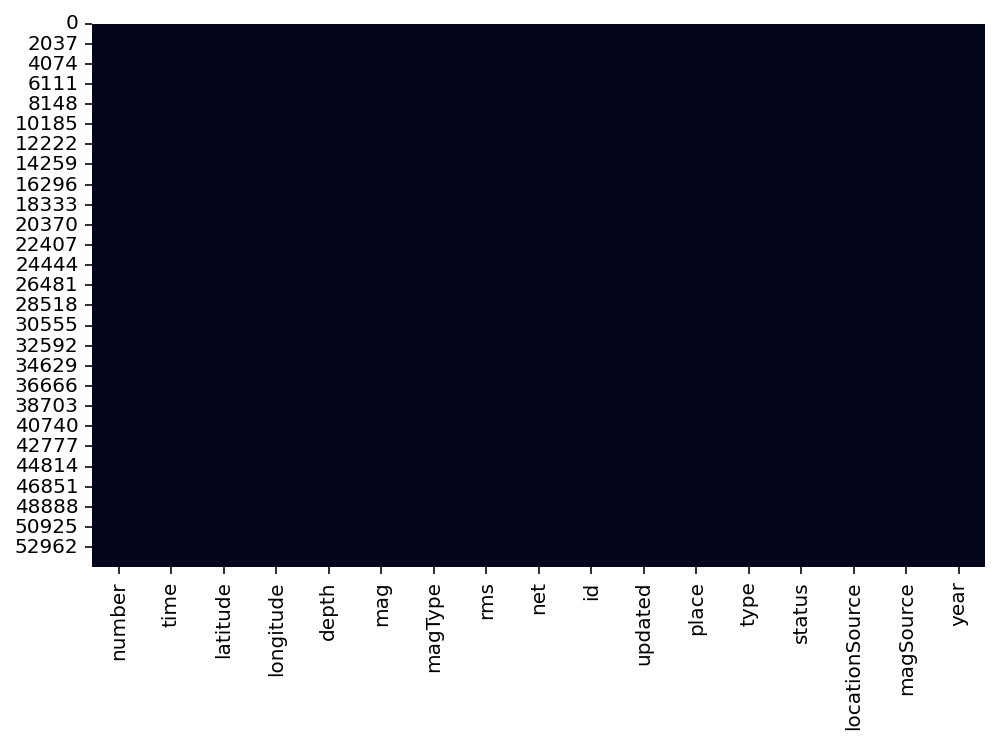

In [539]:
plt.figure(figsize = (8, 5))

sns.heatmap(df.isnull(), cbar=False)

In [540]:
import numpy as np
import pandas as pd
from math import sqrt

import pickle
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## for machine learning

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Masking

In [541]:
df_eq = df
df_eq_2=df
df_eq = df_eq[["time", "mag", "longitude", "latitude", "depth"]]
df_eq_2 = df_eq_2[[ "mag", "longitude", "latitude", "depth"]]
df_eq["time"] = pd.to_datetime(df_eq["time"])
df_eq["timestamps"] = df_eq["time"]
# df_eq.set_index('time', inplace=True)


<ipython-input-541-1824bc1c8b48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq["time"] = pd.to_datetime(df_eq["time"])
<ipython-input-541-1824bc1c8b48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq["timestamps"] = df_eq["time"]


In [542]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54985 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54985 non-null  datetime64[ns]
 1   mag         54985 non-null  float64       
 2   longitude   54985 non-null  float64       
 3   latitude    54985 non-null  float64       
 4   depth       54985 non-null  float64       
 5   timestamps  54985 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


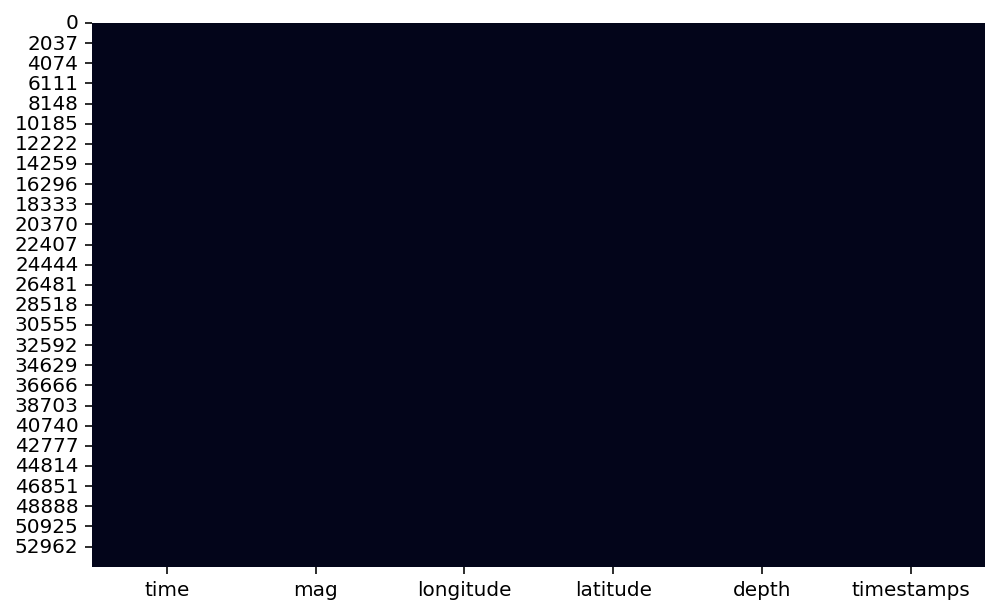

In [543]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_eq.isnull(), cbar=False)

In [544]:
df_eq[df_eq.duplicated('timestamps')]

,time,mag,longitude,latitude,depth,timestamps
563,1978-03-01 22:51:05,4.6,27.1,36.0,89.0,1978-03-01 22:51:05
565,1978-03-01 23:27:58,4.5,42.9,41.0,33.0,1978-03-01 23:27:58
869,1979-03-01 02:50:33,4.2,23.3,39.3,10.0,1979-03-01 02:50:33
871,1979-03-02 15:35:28,4.7,46.7,41.1,33.0,1979-03-02 15:35:28
1595,1981-03-01 01:09:35,3.5,23.3,38.2,10.0,1981-03-01 01:09:35
...,...,...,...,...,...,...
51790,2008-03-01 15:17:20,4.0,21.8,36.3,3.0,2008-03-01 15:17:20
51792,2008-03-01 16:06:26,3.0,21.9,38.4,11.0,2008-03-01 16:06:26
51794,2008-03-01 20:41:23,3.4,25.8,35.7,36.0,2008-03-01 20:41:23
51796,2008-03-01 20:48:22,3.5,21.8,36.2,5.0,2008-03-01 20:48:22


In [545]:
# Dropping rows
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [546]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [547]:
df_eq[df_eq.duplicated('timestamps')]

,time,mag,longitude,latitude,depth,timestamps


In [548]:
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [549]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [550]:
# Number 1: Time intervals between consecutive earthquakes.

df_eq["time_diff"] = df_eq["timestamps"].diff()

df_eq["time_diff_float"] = df_eq["time_diff"].apply(lambda x: x.total_seconds())

#Number 2: the rolling of magnitudes from the last 10 earthquakes

df_eq["mag_roll_10"] = df_eq["mag"].rolling(window=10).mean()

df_eq.dropna(inplace = True)

In [551]:
df_eq.describe().T

,count,mean,std,min,25%,50%,75%,max
mag,54747.0,3.3,0.6,0.7,2.9,3.2,3.6,7.6
longitude,54747.0,25.4,4.9,20.0,21.8,24.1,27.7,48.0
latitude,54747.0,38.5,2.0,30.1,37.2,38.7,39.7,45.0
depth,54747.0,16.7,16.1,0.0,10.0,10.0,22.0,203.9
time_diff,54747,0 days 05:16:54.296783385,0 days 11:47:57.508372316,0 days 00:00:01,0 days 00:32:43,0 days 01:48:02,0 days 05:04:18,12 days 11:25:33
time_diff_float,54747.0,19014.3,42477.5,1.0,1963.0,6482.0,18258.0,1077933.0
mag_roll_10,54747.0,3.3,0.4,1.9,3.0,3.3,3.5,5.1


In [552]:
df_eq[df_eq["time_diff_float"] > 86400].shape

(2317, 9)

In [553]:
df_eq[df_eq["time_diff_float"] > 86400]

,time,mag,longitude,latitude,depth,timestamps,time_diff,time_diff_float,mag_roll_10
12,1976-01-06 20:11:32,3.6,21.8,38.4,33.0,1976-01-06 20:11:32,2 days 21:26:07,249967.0,4.1
13,1976-01-10 07:11:19,4.2,27.8,36.9,30.0,1976-01-10 07:11:19,3 days 10:59:47,298787.0,4.0
15,1976-01-12 17:50:24,5.1,32.5,34.3,33.0,1976-01-12 17:50:24,1 days 20:10:47,159047.0,4.0
20,1976-01-18 15:10:32,5.7,20.6,38.9,33.0,1976-01-18 15:10:32,4 days 04:39:26,362366.0,4.5
21,1976-01-20 00:02:52,3.7,21.6,38.1,54.0,1976-01-20 00:02:52,1 days 08:52:20,118340.0,4.5
...,...,...,...,...,...,...,...,...,...
54951,2008-12-16 04:38:58,3.5,23.6,34.7,13.0,2008-12-16 04:38:58,1 days 03:04:53,97493.0,3.8
54953,2008-12-17 19:02:15,3.7,21.7,38.5,43.2,2008-12-17 19:02:15,1 days 06:54:22,111262.0,3.9
54954,2008-12-18 21:24:01,3.1,26.0,39.2,10.0,2008-12-18 21:24:01,1 days 02:21:46,94906.0,3.8
54956,2008-12-21 00:42:29,3.5,26.3,34.7,36.0,2008-12-21 00:42:29,2 days 03:00:57,183657.0,3.5


In [554]:
min_date = df_eq["time"].min().date()

min_date

datetime.date(1976, 1, 3)

In [555]:
max_date = df_eq["time"].max().date()

max_date

datetime.date(2008, 12, 28)

In [556]:
type(df_eq["time"].max().date())

datetime.date

In [557]:
start_date = min_date

number_of_days = (max_date - min_date).days
print("number_of_days", number_of_days)
date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day))
  date_list.append(a_date)

print(date_list[1], type(date_list[0]))

number_of_days 12048
1976-01-04 <class 'datetime.date'>


In [558]:
df_eq.set_index('time', inplace=True)

In [559]:
df_eq

,mag,longitude,latitude,depth,timestamps,time_diff,time_diff_float,mag_roll_10
time,,,,,,,,
1976-01-03 15:44:13,4.2,22.0,38.5,52.0,1976-01-03 15:44:13,0 days 00:40:20,2420.0,4.2
1976-01-03 16:59:51,3.6,22.0,38.6,57.0,1976-01-03 16:59:51,0 days 01:15:38,4538.0,4.1
1976-01-03 22:45:25,3.7,21.4,38.3,39.0,1976-01-03 22:45:25,0 days 05:45:34,20734.0,4.0
1976-01-06 20:11:32,3.6,21.8,38.4,33.0,1976-01-06 20:11:32,2 days 21:26:07,249967.0,4.1
1976-01-10 07:11:19,4.2,27.8,36.9,30.0,1976-01-10 07:11:19,3 days 10:59:47,298787.0,4.0
...,...,...,...,...,...,...,...,...
2008-12-28 05:22:59,3.5,28.0,35.8,71.4,2008-12-28 05:22:59,0 days 06:30:35,23435.0,3.6
2008-12-28 08:52:24,3.8,29.2,37.8,4.9,2008-12-28 08:52:24,0 days 03:29:25,12565.0,3.6
2008-12-28 16:22:04,3.3,23.4,36.3,0.0,2008-12-28 16:22:04,0 days 07:29:40,26980.0,3.6


In [560]:
df_w = pd.DataFrame() 

df_w['mag_max'] = df_eq.mag.resample('D').max() 
df_w

,mag_max
time,
1976-01-03,4.2
1976-01-04,NaN
1976-01-05,NaN
1976-01-06,3.6
1976-01-07,NaN
...,...
2008-12-24,4.4
2008-12-25,3.7
2008-12-26,2.9


In [561]:
df_daily = pd.DataFrame() 
# AS is year-start frequency

df_daily['mag_max'] = df_eq.mag.resample('D').max() # What is the max of events
df_daily['event_count'] = df_eq.mag.resample('D').count() #How many events happened 
df_daily['mag_mean'] = df_eq.mag.resample('D').mean() #What is the mean of values for that particular day
df_daily['mag_sum'] = df_eq.mag.resample('D').sum() # What is the sum of moments
df_daily['mag_scatter'] = (df_eq.mag.resample('D').std()) # What is the scatter of event magnitudes
df_daily["mag_roll_3"] = df_daily["mag_mean"].rolling(window=3).mean()


df_daily['longitude_mean'] = df_eq.longitude.resample('D').mean() #Mean location of events 
df_daily['longitude_std'] = df_eq.longitude.resample('D').std() #Std location of events 

df_daily['latitude_mean'] = df_eq.latitude.resample('D').mean() #Mean location of events 
df_daily['latitude_std'] = df_eq.latitude.resample('D').std() #Std location of events 

df_daily['depth_mean'] = df_eq.depth.resample('D').mean() #Mean location of events 
df_daily['depth_std'] = df_eq.depth.resample('D').std() #Std location of events 

df_daily['time_diff_float_mean'] = df_eq.time_diff_float.resample('D').mean() #Event spacing 
df_daily['time_diff_float_std'] = df_eq.time_diff_float.resample('D').std() #Std location of events 


df_daily

,mag_max,event_count,mag_mean,mag_sum,mag_scatter,mag_roll_3,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,,,
1976-01-03,4.2,3,3.8,11.5,0.3,NaN,21.8,0.3,38.5,0.2,49.3,9.3,9230.7,10018.3
1976-01-04,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-05,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-06,3.6,1,3.6,3.6,NaN,NaN,21.8,NaN,38.4,NaN,33.0,NaN,249967.0,NaN
1976-01-07,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.4,7,3.8,26.9,0.3,NaN,28.1,2.8,37.6,0.6,7.7,6.3,18051.7,21725.7
2008-12-25,3.7,9,3.1,28.2,0.3,3.7,30.0,2.1,37.7,0.8,10.4,12.3,9540.1,16642.9
2008-12-26,2.9,1,2.9,2.9,NaN,3.3,40.2,NaN,39.2,NaN,8.6,NaN,80286.0,NaN


In [562]:
#sns.pairplot(df_eq, hue=None);


In [563]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           7600 non-null   float64
 5   mag_roll_3            7227 non-null   float64
 6   longitude_mean        9604 non-null   float64
 7   longitude_std         7600 non-null   float64
 8   latitude_mean         9604 non-null   float64
 9   latitude_std          7600 non-null   float64
 10  depth_mean            9604 non-null   float64
 11  depth_std             7600 non-null   float64
 12  time_diff_float_mean  9604 non-null   float64
 13  time_diff_float_std   7600 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB

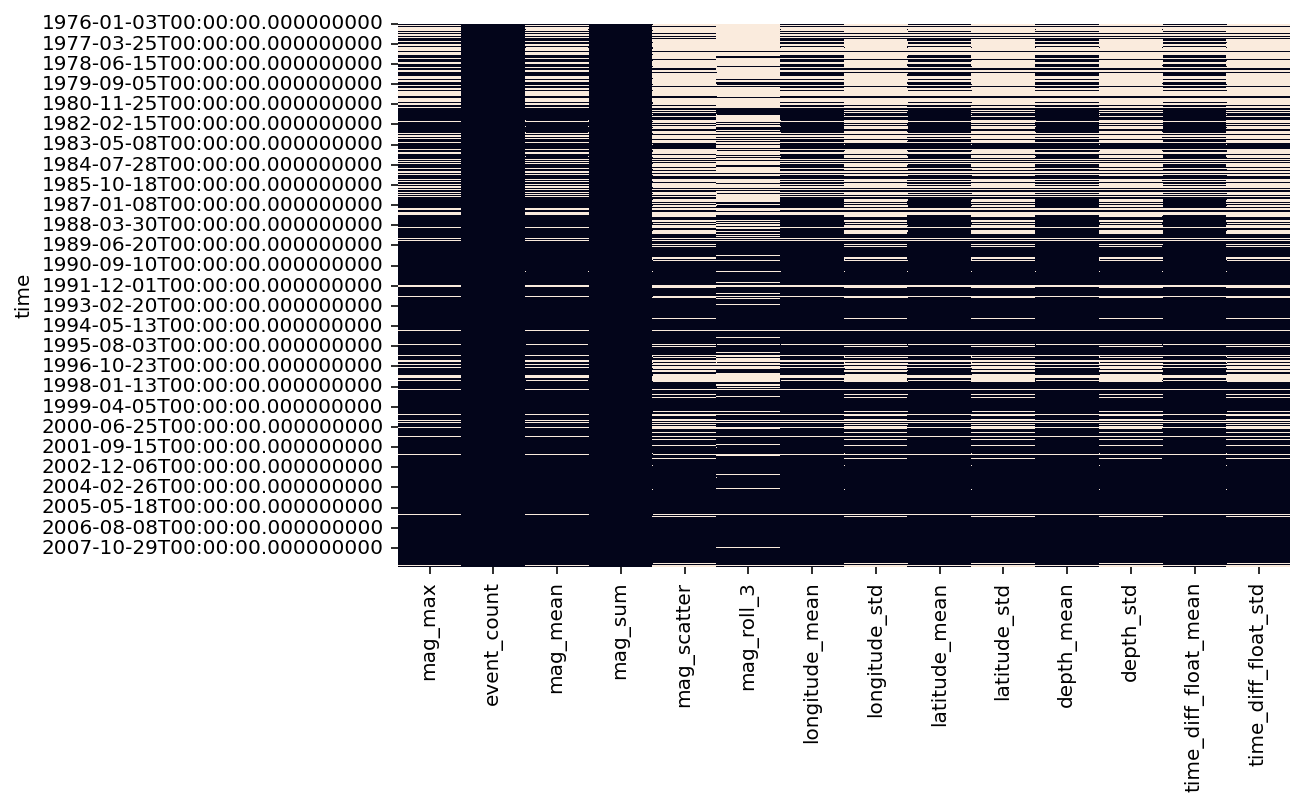

In [564]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_daily.isnull(), cbar=False)


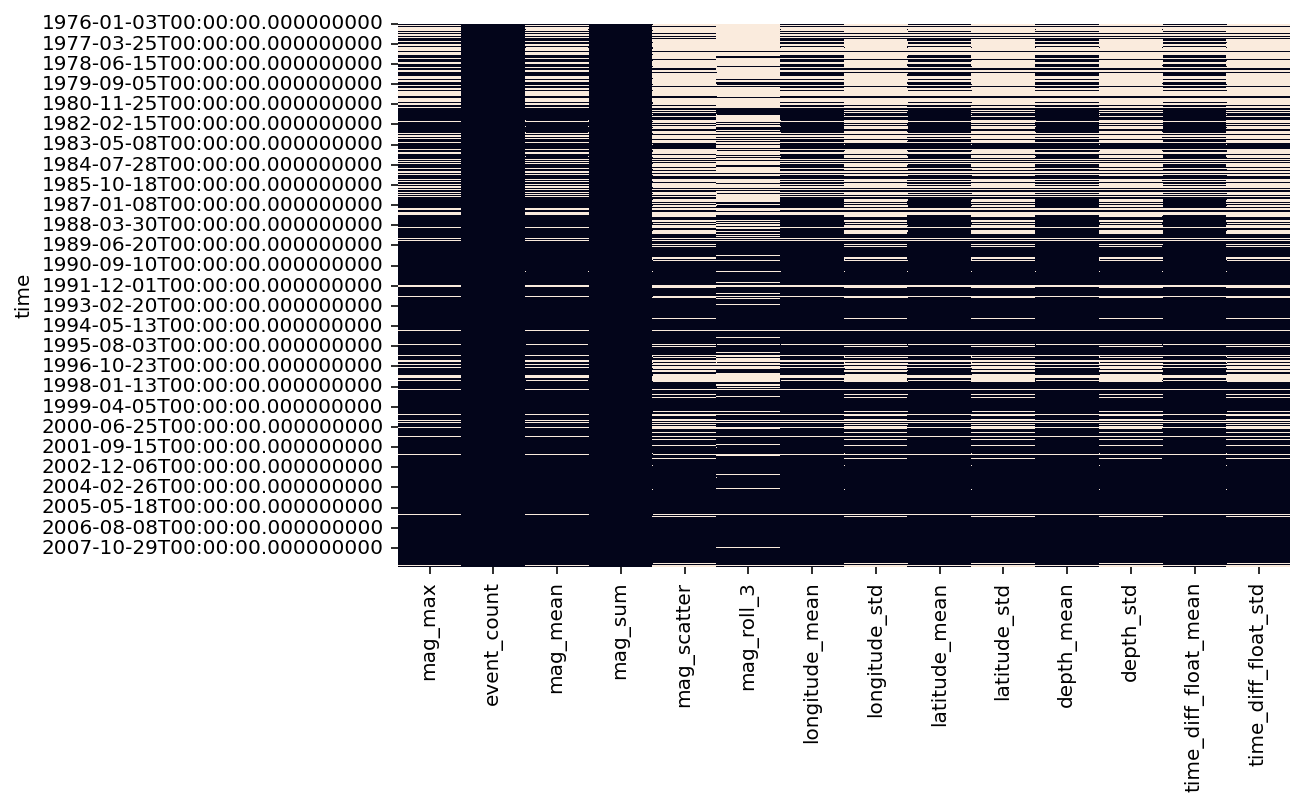

In [565]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily.isnull(), cbar=False)

In [566]:
df_daily_clean = df_daily[df_daily.index > "1972-01-01"]

df_daily_clean.drop(columns = ["mag_roll_3"], inplace = True)

df_daily_clean.drop(columns = ["mag_scatter"], inplace = True)

df_daily_clean

,mag_max,event_count,mag_mean,mag_sum,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,
1976-01-03,4.2,3,3.8,11.5,21.8,0.3,38.5,0.2,49.3,9.3,9230.7,10018.3
1976-01-04,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-05,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-06,3.6,1,3.6,3.6,21.8,NaN,38.4,NaN,33.0,NaN,249967.0,NaN
1976-01-07,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.4,7,3.8,26.9,28.1,2.8,37.6,0.6,7.7,6.3,18051.7,21725.7
2008-12-25,3.7,9,3.1,28.2,30.0,2.1,37.7,0.8,10.4,12.3,9540.1,16642.9
2008-12-26,2.9,1,2.9,2.9,40.2,NaN,39.2,NaN,8.6,NaN,80286.0,NaN


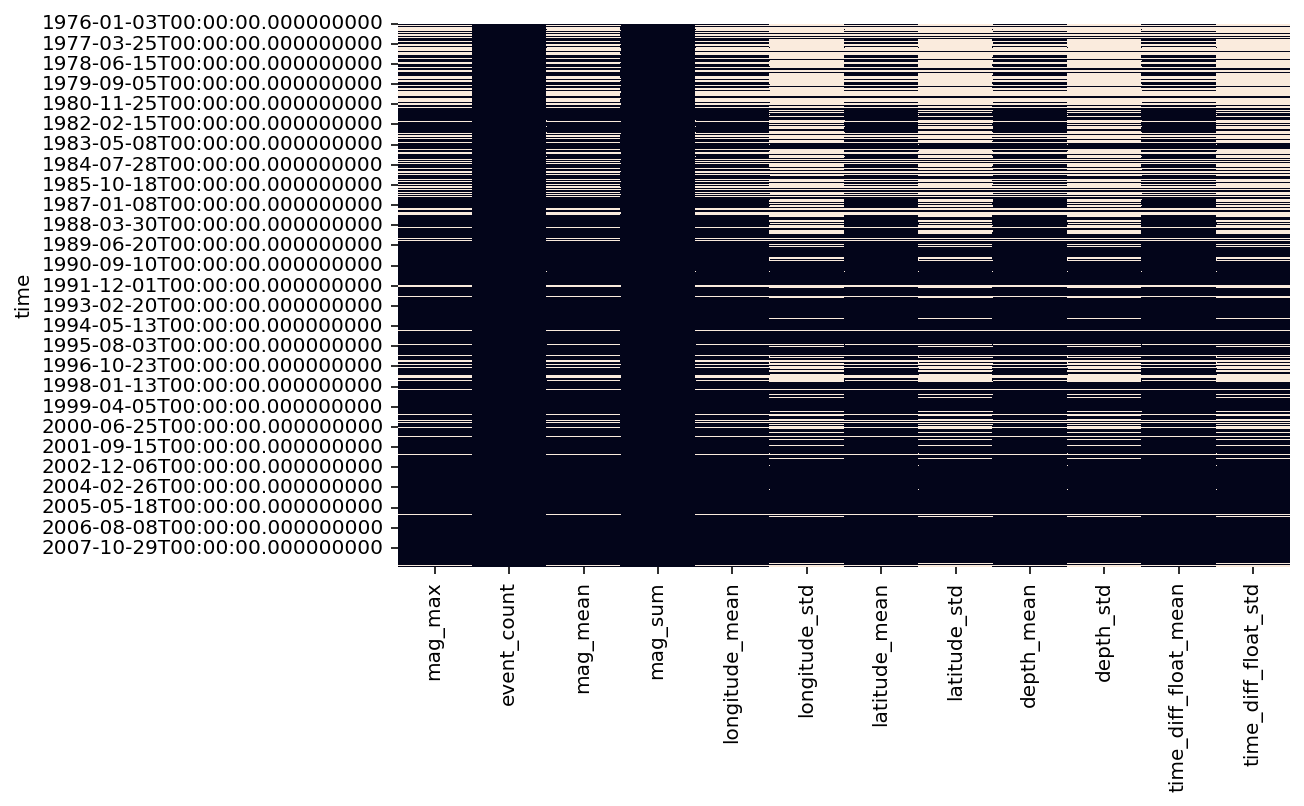

In [567]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily_clean.isnull(), cbar=False)

In [568]:
df_daily_clean.isnull().sum()

mag_max                 2445
event_count                0
mag_mean                2445
mag_sum                    0
longitude_mean          2445
                        ... 
latitude_std            4449
depth_mean              2445
depth_std               4449
time_diff_float_mean    2445
time_diff_float_std     4449
Length: 12, dtype: int64

In [569]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   longitude_mean        9604 non-null   float64
 5   longitude_std         7600 non-null   float64
 6   latitude_mean         9604 non-null   float64
 7   latitude_std          7600 non-null   float64
 8   depth_mean            9604 non-null   float64
 9   depth_std             7600 non-null   float64
 10  time_diff_float_mean  9604 non-null   float64
 11  time_diff_float_std   7600 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.2 MB


In [570]:
#Source: https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
df_daily_clean.interpolate('time', inplace = True)
df_daily_clean

,mag_max,event_count,mag_mean,mag_sum,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,
1976-01-03,4.2,3,3.8,11.5,21.8,0.3,38.5,0.2,49.3,9.3,9230.7,10018.3
1976-01-04,4.0,0,3.8,0.0,21.8,0.9,38.5,0.3,43.9,10.9,89476.1,33506.5
1976-01-05,3.8,0,3.7,0.0,21.8,1.4,38.5,0.4,38.4,12.5,169721.6,56994.6
1976-01-06,3.6,1,3.6,3.6,21.8,2.0,38.4,0.5,33.0,14.1,249967.0,80482.8
1976-01-07,3.8,0,3.7,0.0,22.6,2.5,38.2,0.7,35.9,15.7,231335.9,103971.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.4,7,3.8,26.9,28.1,2.8,37.6,0.6,7.7,6.3,18051.7,21725.7
2008-12-25,3.7,9,3.1,28.2,30.0,2.1,37.7,0.8,10.4,12.3,9540.1,16642.9
2008-12-26,2.9,1,2.9,2.9,40.2,2.5,39.2,1.5,8.6,11.9,80286.0,16662.9


In [571]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               12049 non-null  float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              12049 non-null  float64
 3   mag_sum               12049 non-null  float64
 4   longitude_mean        12049 non-null  float64
 5   longitude_std         12049 non-null  float64
 6   latitude_mean         12049 non-null  float64
 7   latitude_std          12049 non-null  float64
 8   depth_mean            12049 non-null  float64
 9   depth_std             12049 non-null  float64
 10  time_diff_float_mean  12049 non-null  float64
 11  time_diff_float_std   12049 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.2 MB


In [572]:
NaN_featuresx = [feature for feature in df_daily_clean.columns if ((df_daily_clean[feature].dtypes != 'O') & (df_daily_clean[feature].count() < df_daily_clean.shape[0]))]
NaN_featuresx

[]

In [573]:
df_eq = df_daily_clean
df_eq.shape

(12049, 12)

In [574]:
## Large earthquakes labeling:
label = []
cnt = 0
for i, mag in enumerate(df_eq["mag_max"]):
    if (mag>5.5):
        cnt = cnt + 1
        label.append(int(cnt))
    else:
        label.append(0)

df_eq["large_eq_label"] = label

In [575]:
df_eq.describe().T

,count,mean,std,min,25%,50%,75%,max
mag_max,12049.0,4.0,0.6,1.2,3.6,4.0,4.4,7.6
event_count,12049.0,4.5,5.7,0.0,1.0,3.0,6.0,101.0
mag_mean,12049.0,3.5,0.6,1.2,3.2,3.5,3.9,5.9
mag_sum,12049.0,15.0,18.7,0.0,3.4,9.3,21.1,347.3
longitude_mean,12049.0,25.8,4.3,20.0,23.0,24.9,27.3,48.0
...,...,...,...,...,...,...,...,...
depth_mean,12049.0,21.2,16.2,0.0,10.0,16.5,26.3,203.9
depth_std,12049.0,11.7,12.4,0.0,2.9,9.6,15.0,112.4
time_diff_float_mean,12049.0,74387.8,107313.6,874.5,12831.6,31053.0,92057.0,1077933.0
time_diff_float_std,12049.0,45080.9,57304.4,33.9,11270.3,23784.6,56499.2,646478.7


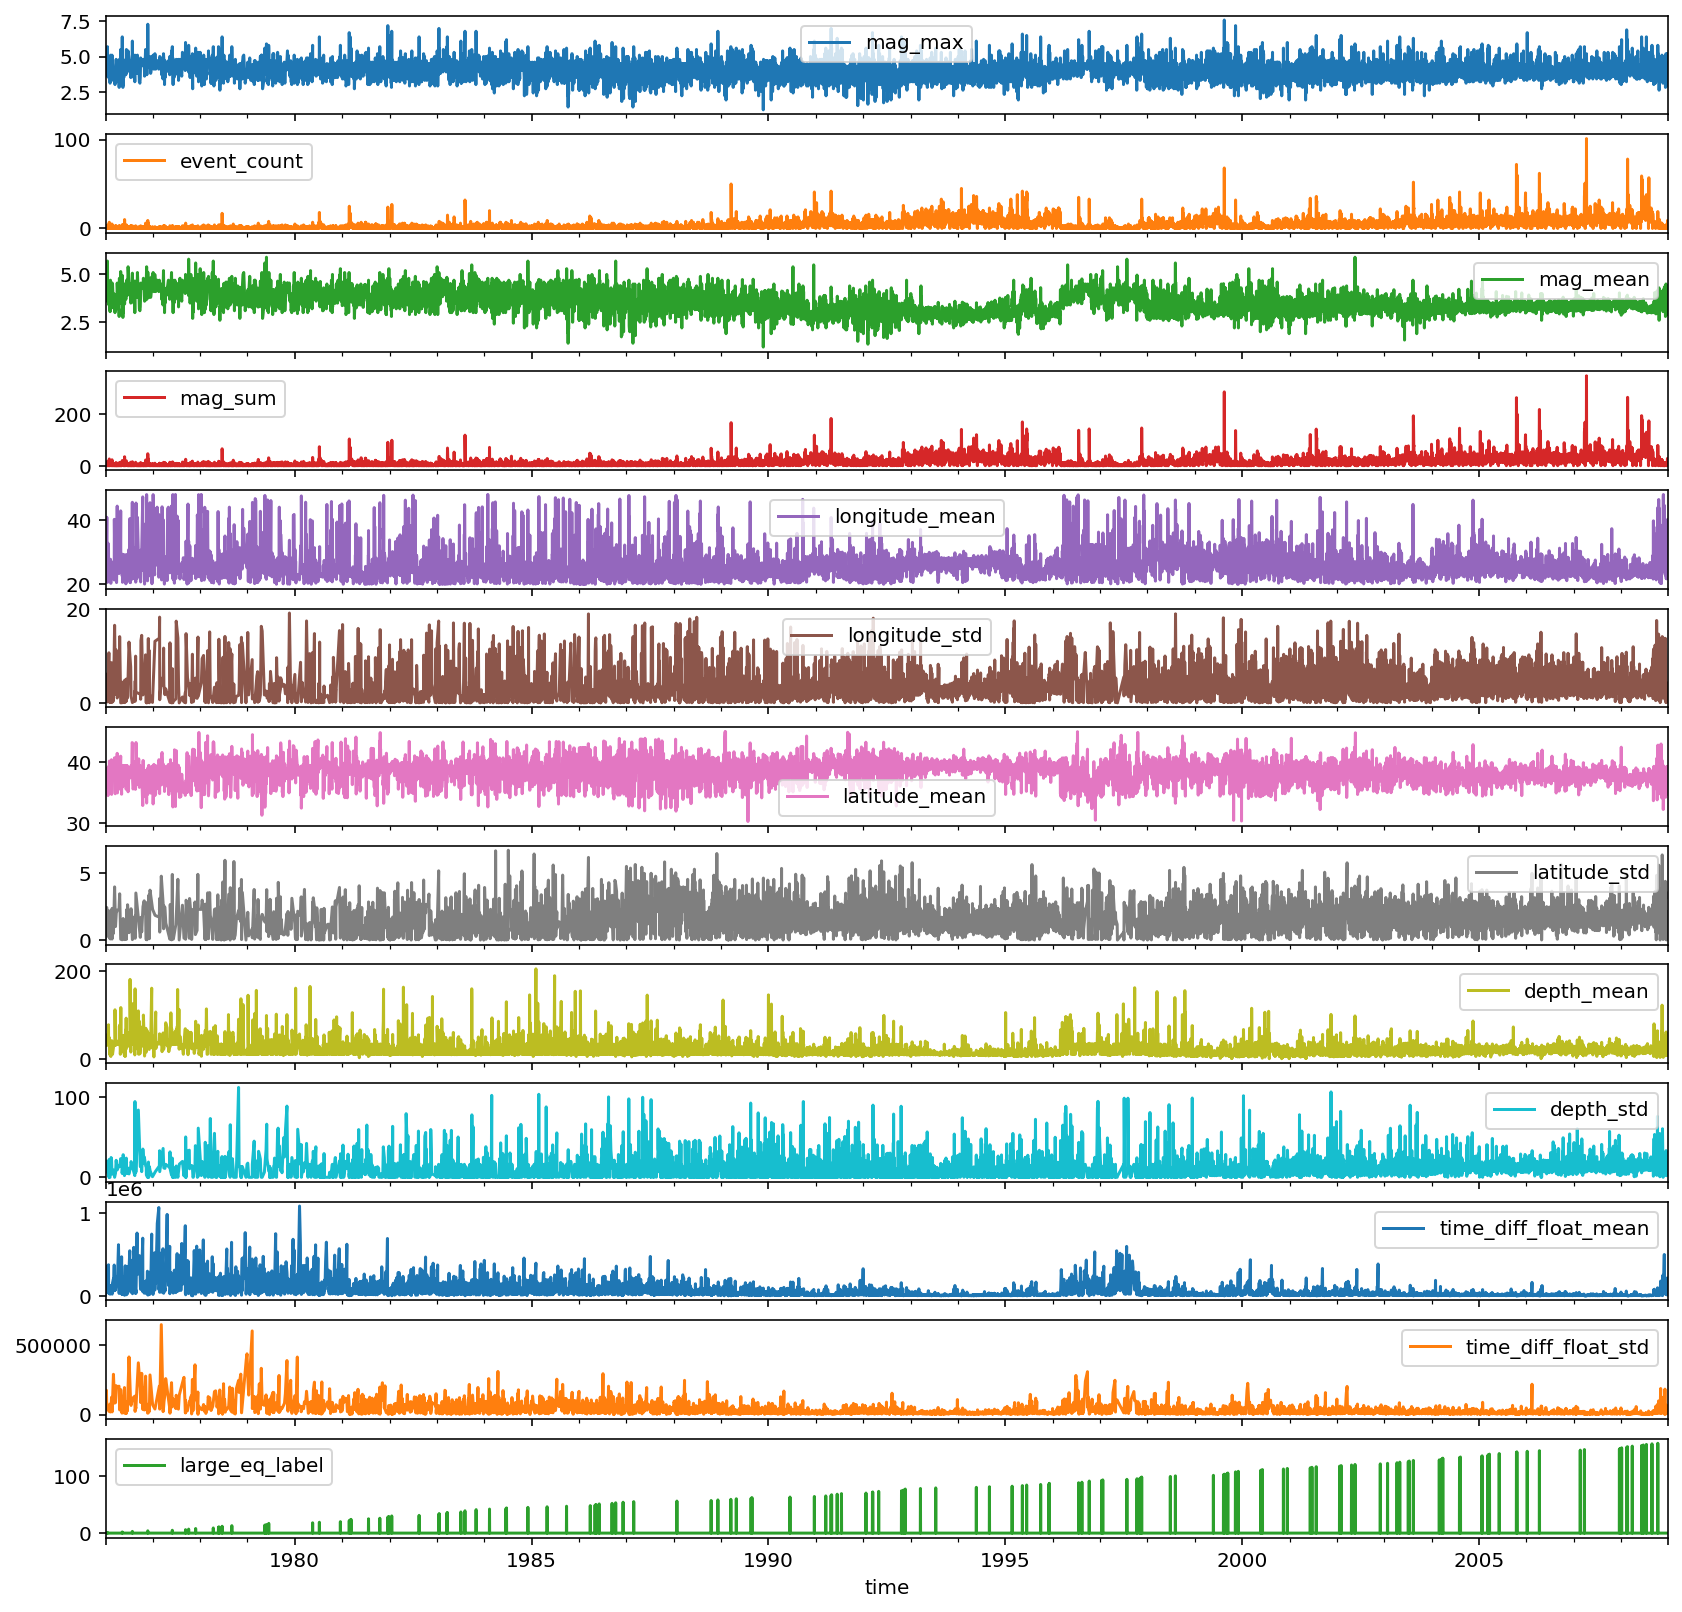

In [576]:
df_eq.plot(subplots=True,figsize=(14,14));

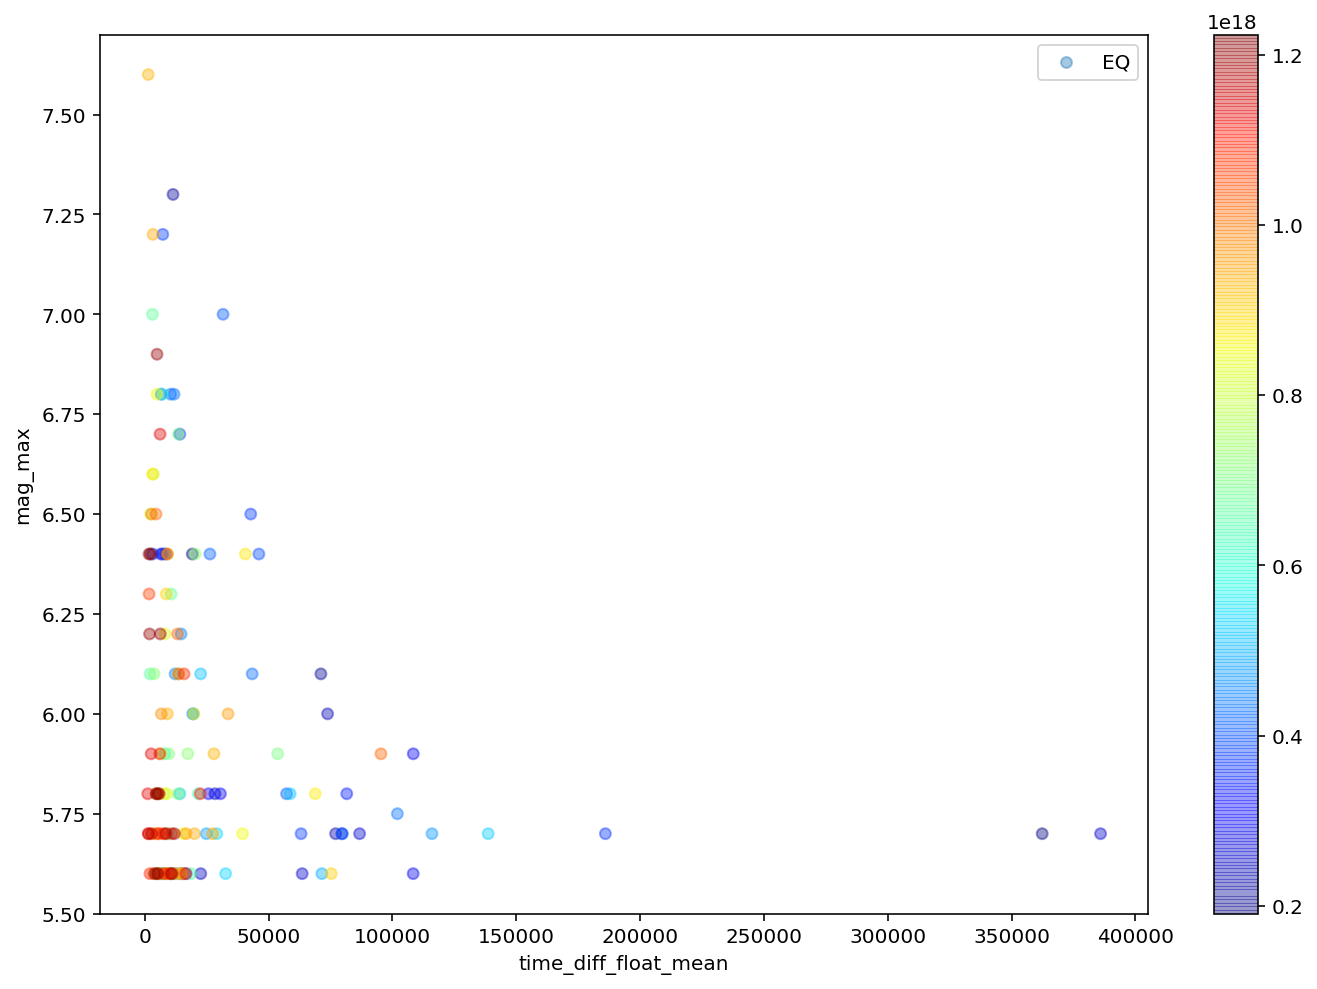

In [577]:
large_eq = df_eq[df_eq["large_eq_label"]>0]

ax = plt.gca()


large_eq.plot(kind="scatter", x="time_diff_float_mean", y="mag_max",
    s=30, label="EQ",
    c=large_eq.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.tight_layout()

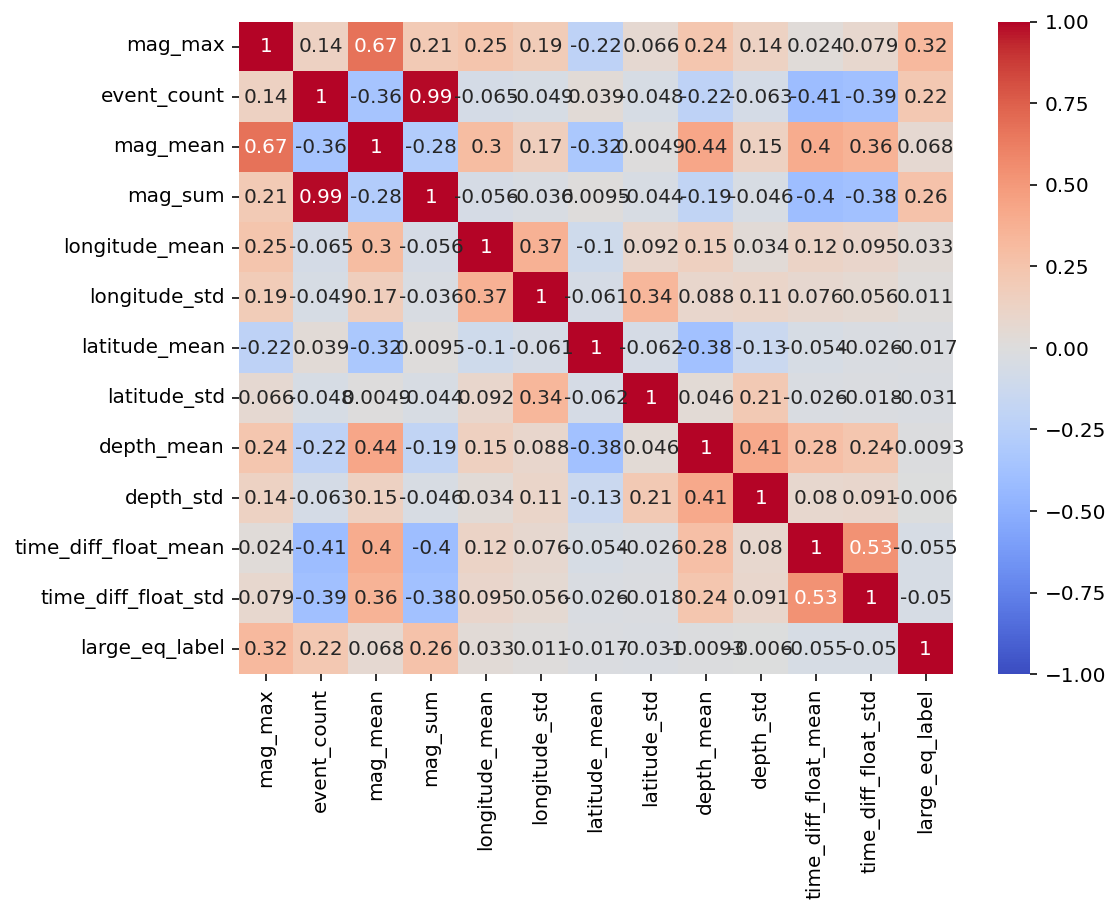

In [578]:
df_corr = df_eq.corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,
        vmin=-1,
        cmap='coolwarm',
        annot=True);
# plt.savefig("../plots/Loma_prieta_EDA_corr_plots.png")

In [579]:
df_eq.head(1)

,mag_max,event_count,mag_mean,mag_sum,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std,large_eq_label
time,,,,,,,,,,,,,
1976-01-03,4.2,3,3.8,11.5,21.8,0.3,38.5,0.2,49.3,9.3,9230.7,10018.3,0


Text(0, 0.5, 'Latitude')

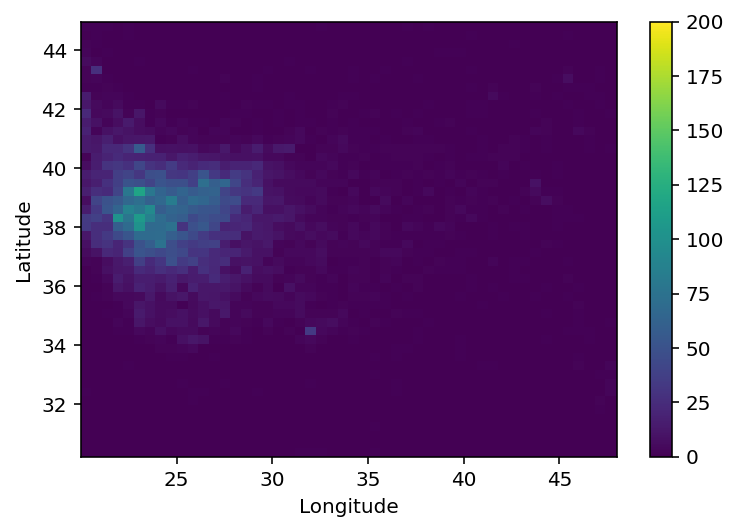

In [580]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]

plt.hist2d(df_eq_plot['longitude_mean'], df_eq_plot['latitude_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Depth (km)')

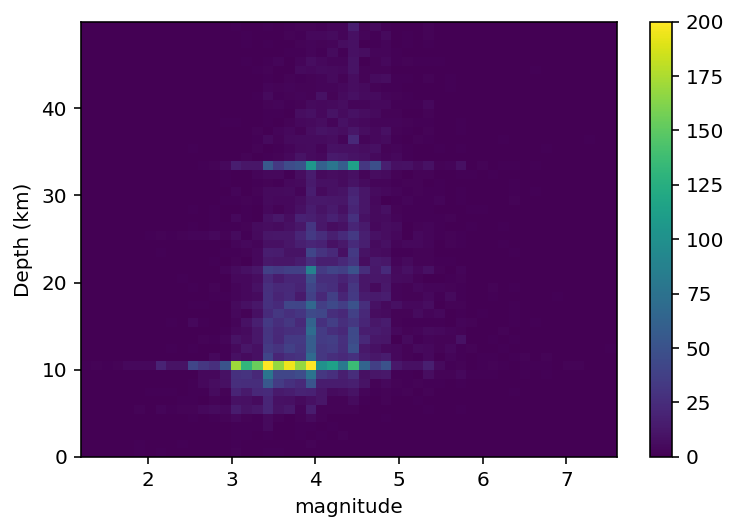

In [581]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]
plt.hist2d(df_eq_plot['mag_max'], df_eq_plot['depth_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('magnitude')
plt.ylabel('Depth (km)')

In [582]:
df_eq["time_diff_float_mean"].describe()

count     12049.0
mean      74387.8
std      107313.6
min         874.5
25%       12831.6
50%       31053.0
75%       92057.0
max     1077933.0
Name: time_diff_float_mean, dtype: float64

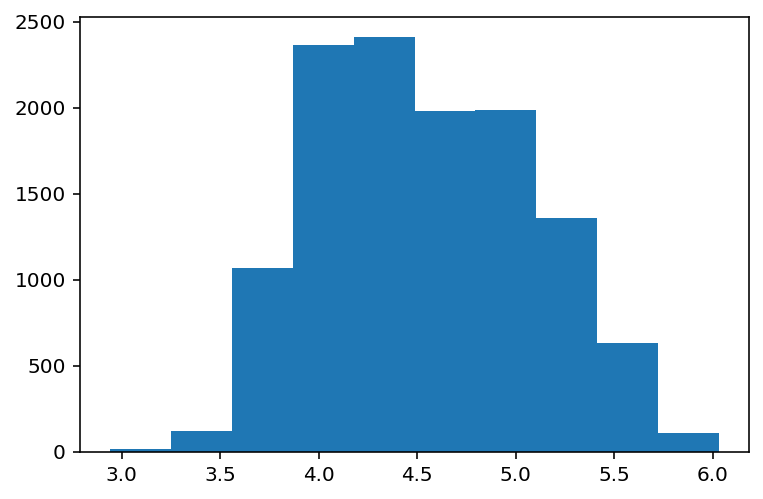

In [583]:
plt.hist(np.log10(df_eq["time_diff_float_mean"]));

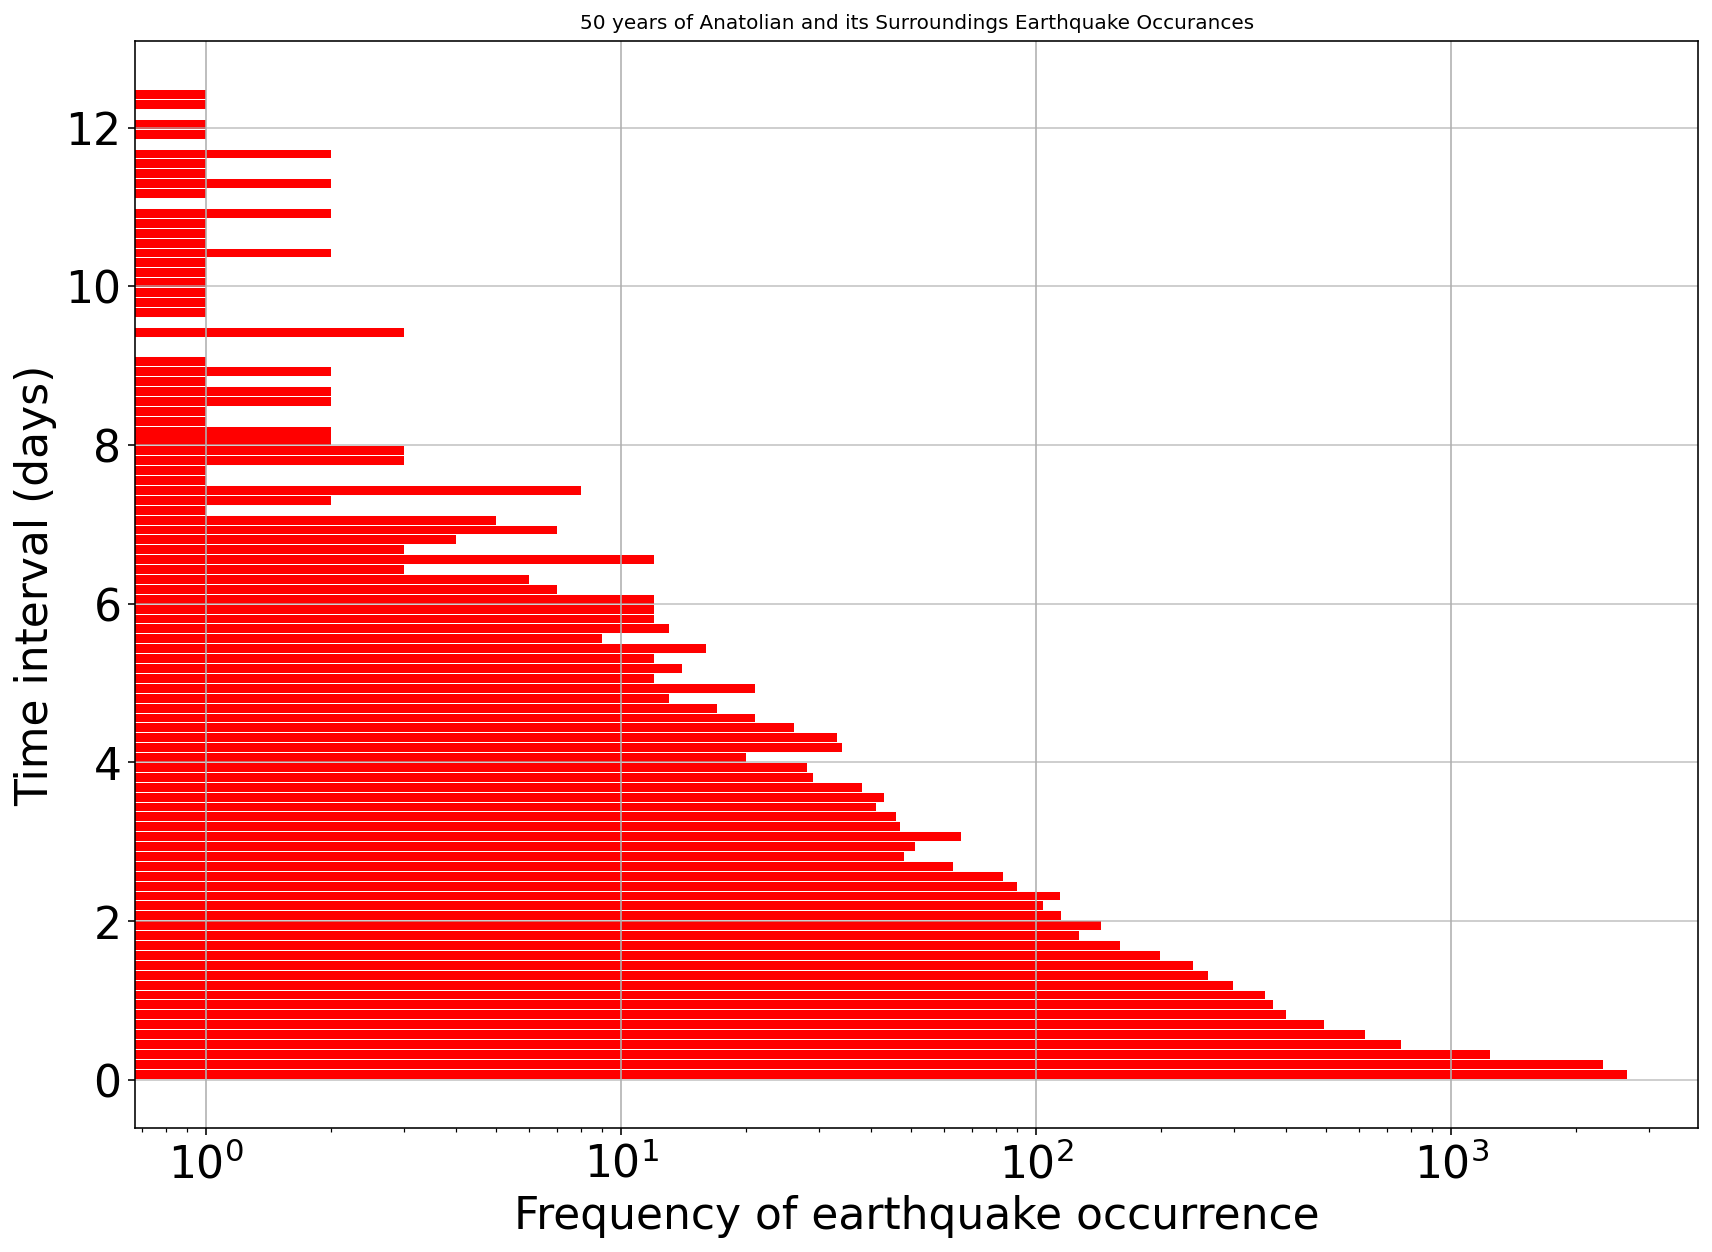

In [584]:
df_eq_plot = df_eq.copy()
df_eq_plot["time_days"] = (np.array(df_eq_plot["time_diff_float_mean"])/86_400)


%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (14, 10));


df_eq_plot["time_days"].plot.hist(grid=True, bins=100, rwidth=0.9,orientation="horizontal",
                   color='red')

plt.title('50 years of Anatolian and its Surroundings Earthquake Occurances',fontsize = 10)
plt.ylabel('Time interval (days)',fontsize = 22)
plt.xlabel('Frequency of earthquake occurrence',fontsize = 22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

# plt.ylim(0, 6)
plt.grid(axis='y', alpha=0.75)

plt.xscale('log')


plt.savefig('/content/')

Splitting data

In [585]:
df_eq_model = df_eq.drop(columns = ["large_eq_label"])

train_size = int(len(df_eq_model)* 0.9)
test_size = len(df_eq_model) - train_size
train, test = df_eq_model.iloc[0:train_size], df_eq_model.iloc[train_size:len(df_eq_model)]

print(train.shape, test.shape)

(10844, 12) (1205, 12)


In [586]:
train.head(5)


,mag_max,event_count,mag_mean,mag_sum,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,
1976-01-03,4.2,3,3.8,11.5,21.8,0.3,38.5,0.2,49.3,9.3,9230.7,10018.3
1976-01-04,4.0,0,3.8,0.0,21.8,0.9,38.5,0.3,43.9,10.9,89476.1,33506.5
1976-01-05,3.8,0,3.7,0.0,21.8,1.4,38.5,0.4,38.4,12.5,169721.6,56994.6
1976-01-06,3.6,1,3.6,3.6,21.8,2.0,38.4,0.5,33.0,14.1,249967.0,80482.8
1976-01-07,3.8,0,3.7,0.0,22.6,2.5,38.2,0.7,35.9,15.7,231335.9,103971.0


In [587]:
f_columns = ['event_count', 'mag_mean', 'mag_sum', 
       'longitude_mean', 'longitude_std', 'latitude_mean', 'latitude_std',
       'depth_mean', 'depth_std', 'time_diff_float_mean',
       'time_diff_float_std']

f_transformer = RobustScaler()
mag_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
mag_transformer = mag_transformer.fit(train[["mag_max"]])

In [588]:
f_transformer.get_params()

{'copy': True,
 'quantile_range': (25.0, 75.0),
 'unit_variance': False,
 'with_centering': True,
 'with_scaling': True}

In [589]:
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train["mag_max"] = mag_transformer.transform(train[["mag_max"]])

test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test["mag_max"] = mag_transformer.transform(test[["mag_max"]])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-589-70270e94569e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["mag_max"] = mag_transformer.transform(train[["mag_max"]])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [590]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)- time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [591]:
TIME_STEPS = 120

X_train, y_train = create_dataset(train, train["mag_max"], time_steps = TIME_STEPS)

X_test, y_test = create_dataset(test, test["mag_max"], time_steps= TIME_STEPS)

In [592]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(10724, 120, 12) (10724,)
(1085, 120, 12) (1085,)


In [593]:
X_train[0][0]

array([ 0.25      ,  0.25      ,  0.4       ,  0.22972973, -0.69755461,
       -0.7543504 , -0.0599921 , -1.00744485,  1.93399551,  0.01810367,
       -0.33168352, -0.35529331])

In [594]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape = (X_train.shape[1], X_train.shape[2]),
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.LSTM(units=128,
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.LSTM(units=64,
                                   return_sequences = False))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.Dense(units = 1))

In [595]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=32,
            input_shape = (X_train.shape[1], X_train.shape[2])
        )
    )
)
# Adding dropout layer to regularize complexities 
model.add(keras.layers.Dropout(rate = 0.7))

# Add output layer
model.add(keras.layers.Dense(units = 1))

In [596]:
# Compiling 
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [597]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.33, 
    shuffle = False 
)

Epoch 1/10
225/225 [==============================] - 25s 90ms/step - loss: 0.7208 - val_loss: 0.4986
Epoch 2/10
225/225 [==============================] - 17s 77ms/step - loss: 0.5847 - val_loss: 0.4928
Epoch 3/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5619 - val_loss: 0.4909
Epoch 4/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5386 - val_loss: 0.4898
Epoch 5/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5273 - val_loss: 0.4890
Epoch 6/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5238 - val_loss: 0.4882
Epoch 7/10
225/225 [==============================] - 16s 73ms/step - loss: 0.5155 - val_loss: 0.4875
Epoch 8/10
225/225 [==============================] - 17s 77ms/step - loss: 0.5068 - val_loss: 0.4872
Epoch 9/10
225/225 [==============================] - 17s 74ms/step - loss: 0.5080 - val_loss: 0.4860
Epoch 10/10
225/225 [==============================] - 17s 76ms/step - loss: 0.505

In [598]:
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 64)               11520     
 nal)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,585
Trainable params: 11,585
Non-trainable params: 0
_________________________________________________________________


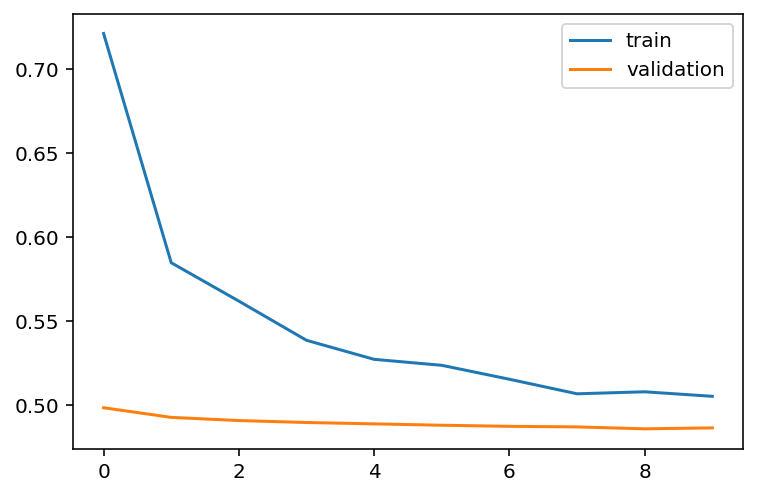

In [599]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()

In [600]:
y_pred = model.predict(X_test)


34/34 [==============================] - 1s 17ms/step


In [601]:
y_train_inv = mag_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = mag_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = mag_transformer.inverse_transform(y_pred)


In [602]:
y_test_inv[0]

array([3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2])

In [603]:
y_pred_inv[:,0]

array([4.102428 , 4.019649 , 3.9767082, ..., 3.9259124, 3.8035092,
       3.9302695], dtype=float32)

In [604]:
trainScore = np.sqrt(mean_squared_error(y_test_inv[0], y_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (trainScore))

Test Score: 0.51 RMSE


In [605]:
from sklearn.metrics import mean_absolute_error

In [606]:
y_pred_inv

array([[4.102428 ],
       [4.019649 ],
       [3.9767082],
       ...,
       [3.9259124],
       [3.8035092],
       [3.9302695]], dtype=float32)

In [607]:
y_test_inv_cv = y_test_inv.astype(np.float32)

In [608]:
y_test_inv[0]

array([3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2])

In [609]:
len(y_pred_inv)

1085

In [610]:
y_test_inv_cv

array([[3.7, 3.7, 4.1, ..., 2.9, 4.4, 5.2]], dtype=float32)

In [611]:
y_pred_inv[:,0]

array([4.102428 , 4.019649 , 3.9767082, ..., 3.9259124, 3.8035092,
       3.9302695], dtype=float32)

In [644]:
from statistics import mean
y_pred_inv_means = [mean(chunk) for chunk in zip(*[iter(y_pred_inv[:,0])]*15)]
y_test_inv_means = [mean(chunk) for chunk in zip(*[iter(y_test_inv[0])]*15)]

In [645]:
def calculate_percentage_increases(array):
    # Calculate the percentage increase of each element
    percentage_increases = []
    for i in range(1, len(array)):
        percentage_increases.append((array[i] / array[i - 1]) - 1)

    # Convert the percentage increases to percentages
    percentage_increases = [x * 100 for x in percentage_increases]
    return percentage_increases

# Test the function with a sample array
y_pred_inv_means_percentage = [x*3 for x in calculate_percentage_increases(y_pred_inv_means)]
y_test_inv_means_percentage = calculate_percentage_increases(y_test_inv_means)
print(y_pred_inv_means_percentage) 
print(y_test_inv_means_percentage)
len(y_pred_inv_means_percentage)*20

[-2.576172351837158, 0.5257844924926758, -3.3257246017456055, 0.8529067039489746, 5.224049091339111, 9.162569046020508, -13.503438234329224, 3.3719658851623535, -1.3990402221679688, 1.1993050575256348, -1.4795243740081787, -3.8342535495758057, 2.347433567047119, -0.7820248603820801, 0.8553743362426758, -0.05221366882324219, -1.2569010257720947, 2.836775779724121, 1.7528772354125977, -3.971529006958008, 0.8340954780578613, -0.8993983268737793, 1.7941474914550781, -0.5296826362609863, 3.7923216819763184, 1.9884824752807617, -4.974263906478882, 1.161646842956543, 2.0283937454223633, 4.29149866104126, -7.3670268058776855, 2.255129814147949, -2.9305636882781982, 1.7093896865844727, 1.609969139099121, 1.1485934257507324, -0.725322961807251, -0.735783576965332, 1.5680551528930664, -3.5187900066375732, 4.74625825881958, -2.1870195865631104, -0.07100701332092285, 1.1035680770874023, -3.2538771629333496, -1.0329008102416992, 4.656171798706055, -0.3781557083129883, -1.7996549606323242, -2.3755073

1420

In [646]:
print('R2 Score for average increase: ', r2_score(y_test_inv_means_percentage, y_pred_inv_means_percentage))
print('MAE for average increase: ', mean_absolute_error(y_test_inv_means_percentage, y_pred_inv_means_percentage))
print('MSE for average increase: ', np.square(np.subtract(y_test_inv_means_percentage,y_pred_inv_means_percentage)).mean())
print('RMSE for average increase: %.4f' % (trainScore))

R2 Score for average increase:  0.637151502841554
MAE for average increase:  2.8675673074600185
MSE for average increase:  12.48783840916606
RMSE for average increase: 0.5115


In [615]:
y_test_inv_cv = np.reshape(y_test_inv_cv, (-1, 1))

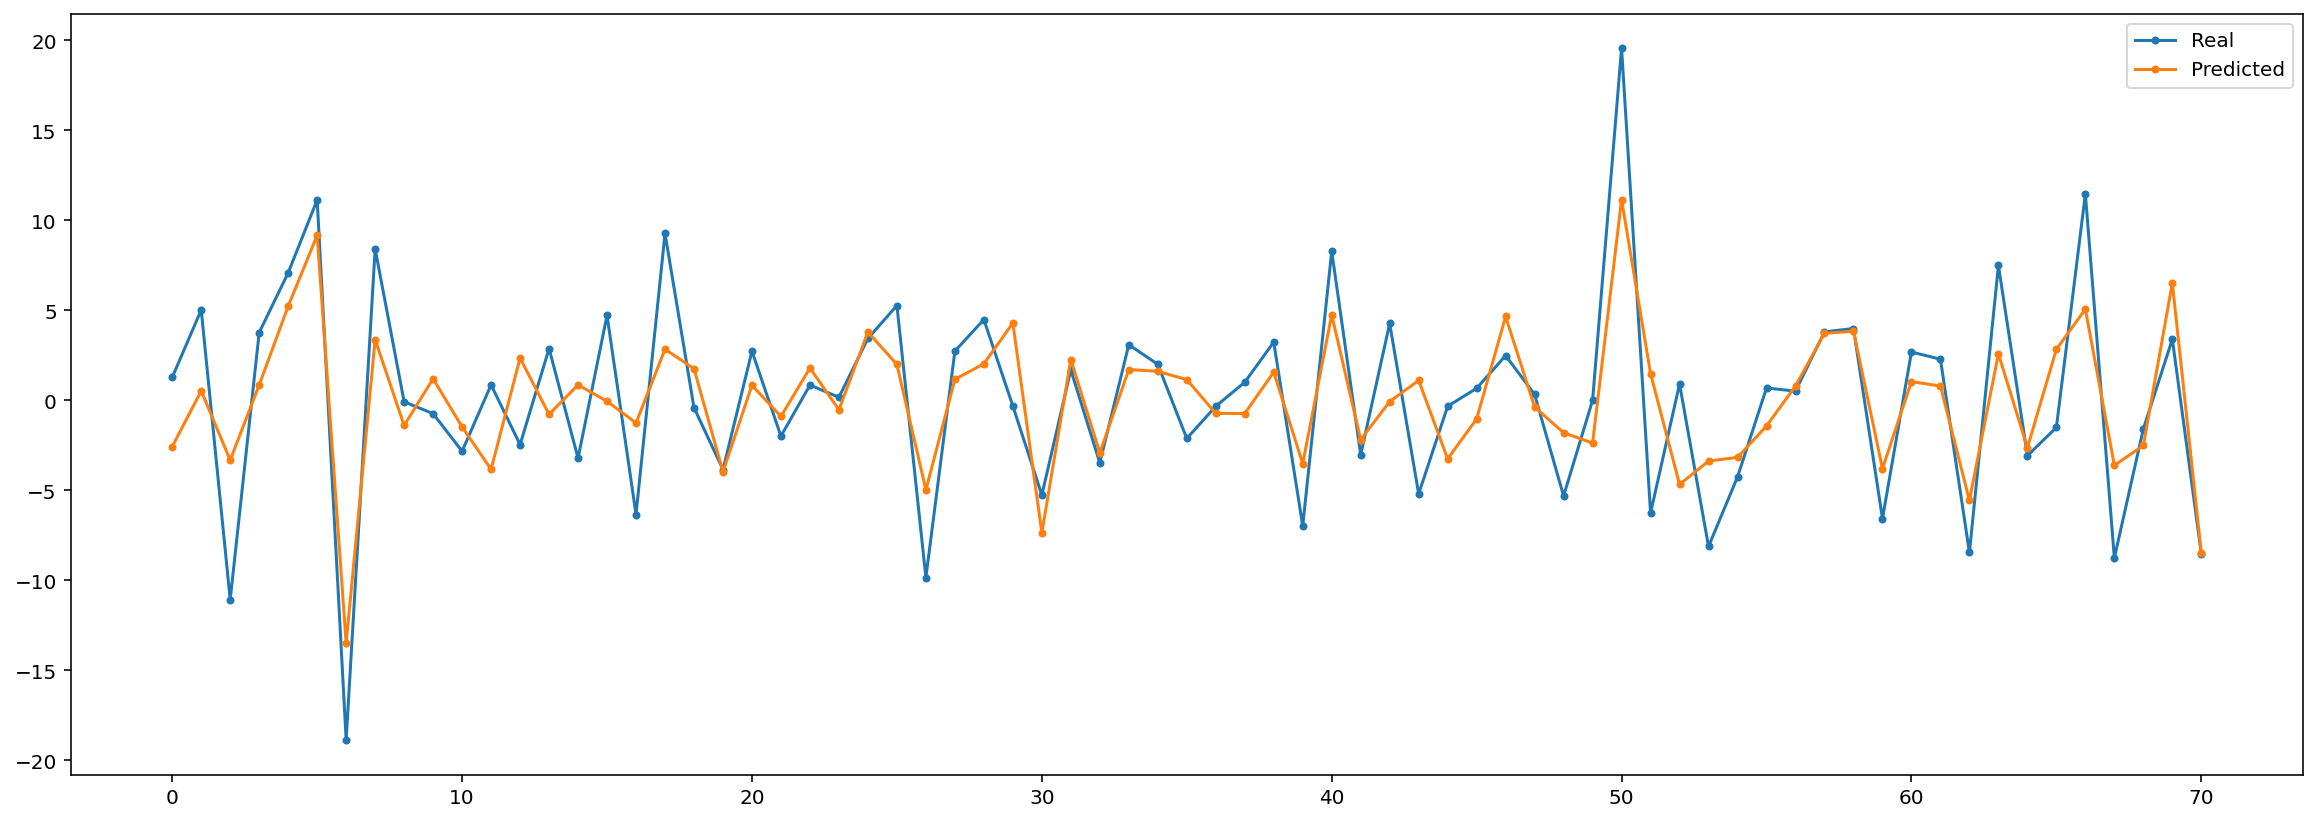

In [647]:
plt.figure(figsize = (20,7))
plt.plot(y_test_inv_means_percentage, marker = '.', label = "Real")
plt.plot(y_pred_inv_means_percentage, marker = '.', label = "Predicted")
plt.legend()

In [617]:
print('R2 Score: ', r2_score(y_test_inv[0], y_pred_inv[:,0]))
print('MAE: ', mean_absolute_error(y_test_inv_cv, y_pred_inv))
print('MSE: ', np.square(np.subtract(y_test_inv_cv,y_pred_inv)).mean())
print('RMSE: %.4f' % (trainScore))

R2 Score:  -0.022903704062311903
MAE:  0.37338185
MSE:  0.26158762
RMSE: 0.5115


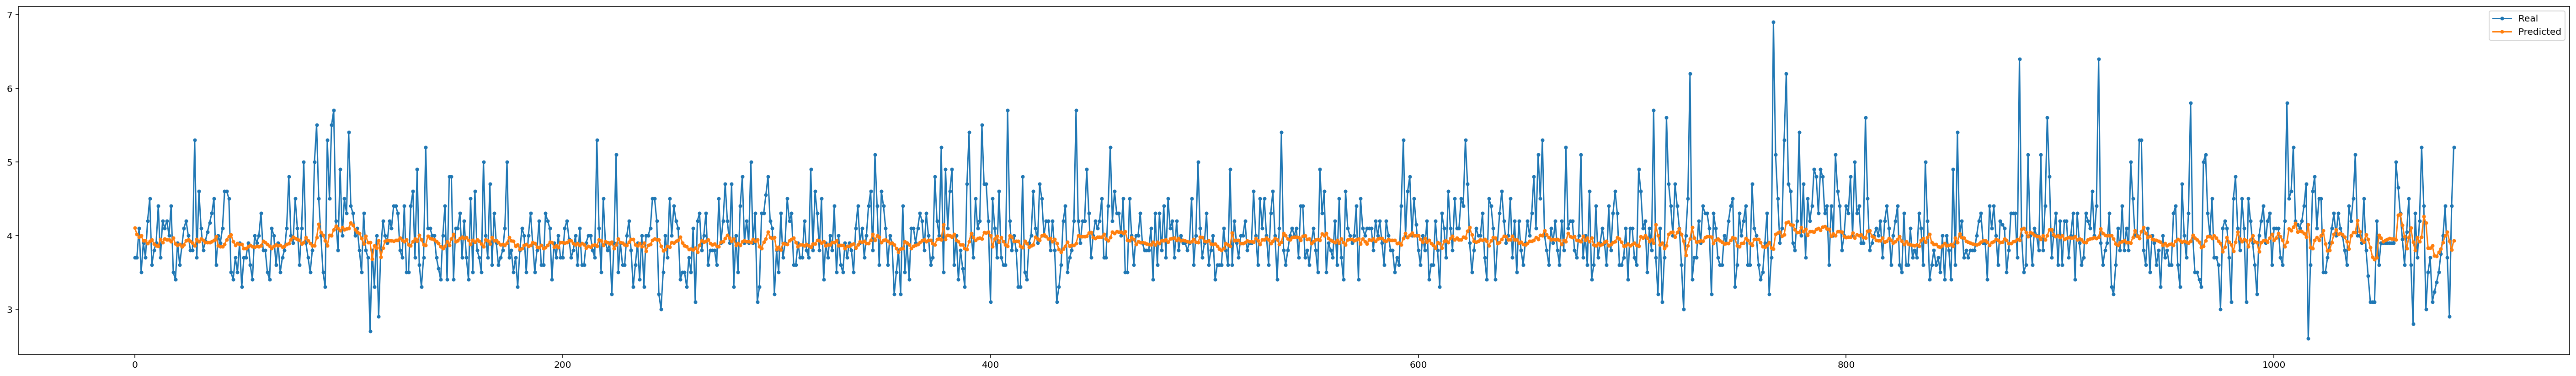

In [618]:
plt.figure(figsize = (50,7))
plt.plot(y_test_inv.flatten(), marker = '.', label = "Real")
plt.plot(y_pred_inv.flatten(), marker = '.', label = "Predicted")
plt.legend()

### After this part i tried to create another model to predict magnitude from latitude, longtitude and depth. In this part google Representation with a Feature Cross programming is used. The instructions there have been followed. 


In [619]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')


In [620]:

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_eq_2, test_size=0.15, random_state=25)


In [621]:
train_df

,mag,longitude,latitude,depth
42780,3.3,26.7,38.1,35.0
47474,3.1,24.0,38.6,32.0
54344,3.3,26.2,35.5,32.0
31895,2.8,27.8,39.3,10.0
43357,3.3,20.9,37.6,9.0
...,...,...,...,...
35702,3.1,20.4,39.9,28.0
26767,2.8,28.2,41.3,10.0
6618,3.5,27.2,35.3,10.0
24894,4.3,21.5,38.9,33.0


In [622]:
# Load the dataset

# Scale the labels
scale_factor = 10.0
# Scale the training set's label.
#train_df["mag"] /= scale_factor 

# Scale the test set's label
#test_df["mag"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [623]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [624]:
train_df

,mag,longitude,latitude,depth
9169,2.9,27.9,39.0,10.0
26372,3.0,26.2,40.4,5.0
28824,4.1,22.6,35.4,5.0
52848,3.4,25.6,38.8,21.0
34882,3.5,20.6,38.7,2.0
...,...,...,...,...
3481,2.8,21.0,43.3,10.0
23668,3.6,21.3,37.1,5.0
17857,2.9,26.9,38.9,10.0
54920,3.0,33.1,39.5,5.0


In [625]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


In [626]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46737 entries, 9169 to 6958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        46737 non-null  float64
 1   longitude  46737 non-null  float64
 2   latitude   46737 non-null  float64
 3   depth      46737 non-null  float64
dtypes: float64(4)
memory usage: 1.8 MB


In [627]:
map(float, df_eq_2)

In [628]:
df_eq_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54985 entries, 0 to 54984
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        54985 non-null  float64
 1   longitude  54985 non-null  float64
 2   latitude   54985 non-null  float64
 3   depth      54985 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


## Train the model with bucket representations

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 1s 2ms/step - loss: 16.0846 - root_mean_squared_error: 4.0106
Epoch 2/30
468/468 [==============================] - 1s 3ms/step - loss: 3.0935 - root_mean_squared_error: 1.7588
Epoch 3/30
468/468 [==============================] - 1s 3ms/step - loss: 3.1014 - root_mean_squared_error: 1.7611
Epoch 4/30
468/468 [==============================] - 1s 3ms/step - loss: 3.0860 - root_mean_squared_error: 1.7567
Epoch 5/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0815 - root_mean_squared_error: 1.7554
Epoch 6/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0501 - root_mean_squared_error: 1.7465
Epoch 7/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0816 - root_mean_squared_error: 1.7554
Epoch 8/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0642 - root_mean_squared_error: 1.7505
Epoch 9/30
468/468 [==============================] - 1s 2ms/step - loss: 3.0294 - root_me

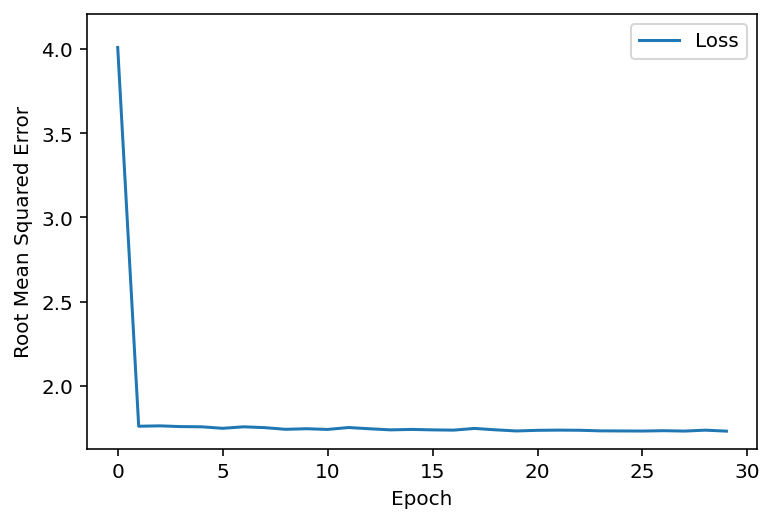


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 2ms/step - loss: 2.7540 - root_mean_squared_error: 1.6595


[2.753993511199951, 1.6595160961151123]

In [629]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'mag'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [630]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 2s 2ms/step - loss: 0.6278 - root_mean_squared_error: 0.7923
Epoch 2/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3268 - root_mean_squared_error: 0.5716
Epoch 3/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - root_mean_squared_error: 0.5710
Epoch 4/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3266 - root_mean_squared_error: 0.5715
Epoch 5/35
468/468 [==============================] - 2s 4ms/step - loss: 0.3260 - root_mean_squared_error: 0.5710
Epoch 6/35
468/468 [==============================] - 2s 4ms/step - loss: 0.3263 - root_mean_squared_error: 0.5712
Epoch 7/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3264 - root_mean_squared_error: 0.5713
Epoch 8/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3263 - root_mean_squared_error: 0.5712
Epoch 9/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3263 - root_mea

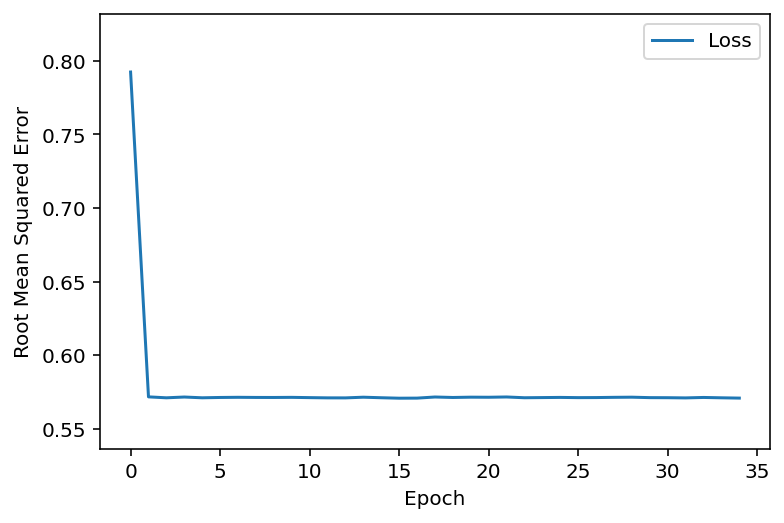


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 2ms/step - loss: 0.3350 - root_mean_squared_error: 0.5788


[0.33498769998550415, 0.578781247138977]

In [631]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [632]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


468/468 [==============================] - 2s 2ms/step - loss: 0.6254 - root_mean_squared_error: 0.7908
Epoch 2/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3266 - root_mean_squared_error: 0.5715
Epoch 3/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3264 - root_mean_squared_error: 0.5713
Epoch 4/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3262 - root_mean_squared_error: 0.5712
Epoch 5/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3258 - root_mean_squared_error: 0.5708
Epoch 6/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3257 - root_mean_squared_error: 0.5707
Epoch 7/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 8/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3259 - root_mean_squared_error: 0.5709
Epoch 9/35
468/468 [==============================] - 1s 2ms/step - loss: 0.3263 - root_mea

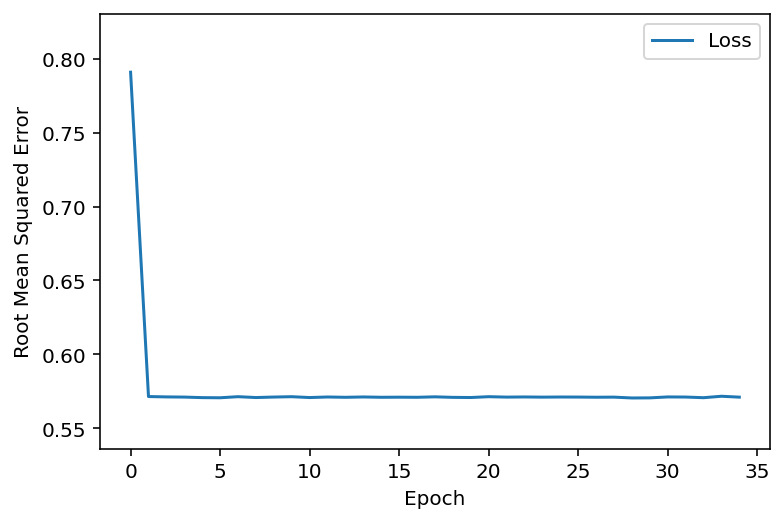


: Evaluate the new model against the test set:
83/83 [==============================] - 0s 2ms/step - loss: 0.3398 - root_mean_squared_error: 0.5830


[0.33983519673347473, 0.5829538702964783]

In [633]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)